In [2]:
from pathlib import Path

import corr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import measure

In [3]:
pth = Path("../../data/low_movement/Experiment-746czi")
pattern = r"frame_*.tif"
frame_paths = list(pth.glob("frame_*.tif"))
if not frame_paths:
    error_msg = f"No files found matching {pattern}"
    raise FileNotFoundError(error_msg)
frame_paths = [x.as_posix() for x in frame_paths]
frame_paths.sort()
frames = [np.array(Image.open(path)).astype(np.float32) for path in frame_paths]
frames = np.asarray(frames)
template_index = corr.find_highest_correlation(frames, plot=False)

In [4]:
# image type
image = frames[0]
print(image.dtype, image.min(), image.max())

float32 25.0 36662.0


In [5]:
min_val, max_val = image.min(), image.max()
img8 = ((image - min_val) / (max_val - min_val) * 255.0).astype(np.uint8)

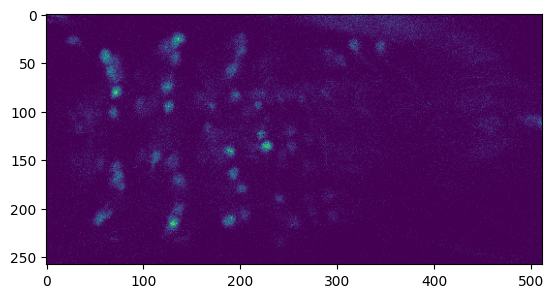

In [6]:
plt.imshow(img8)

0.0


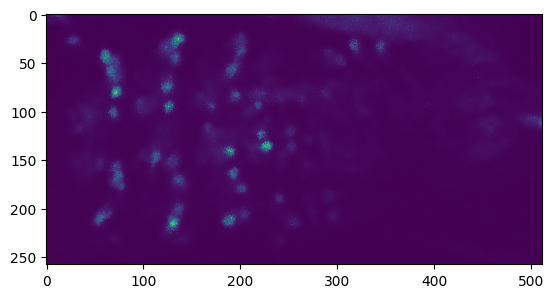

In [7]:
flat = img8.flatten()
median = np.median(flat)
sigma_n = 1.4826 * np.median(np.abs(flat - median))
print(sigma_n)
denoised = cv2.bilateralFilter(img8, d = 10, sigmaColor=20, sigmaSpace=50)
plt.imshow(denoised)

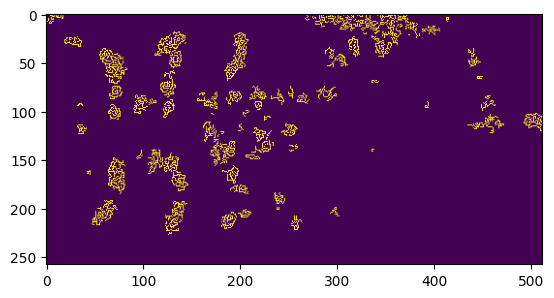

In [8]:

edges = cv2.Canny(img8, 50, 150)
plt.imshow(edges)

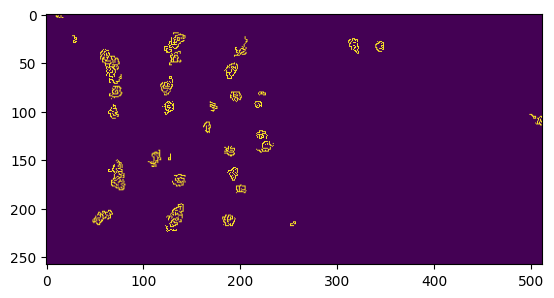

In [9]:
edges = cv2.Canny(denoised, 50, 150)
plt.imshow(edges)

In [10]:
cv2_contours, hierarchy = cv2.findContours(edges,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [12]:
levels = [0.3 * denoised.max(), 0.5 * denoised.max(), 0.7 * denoised.max()]

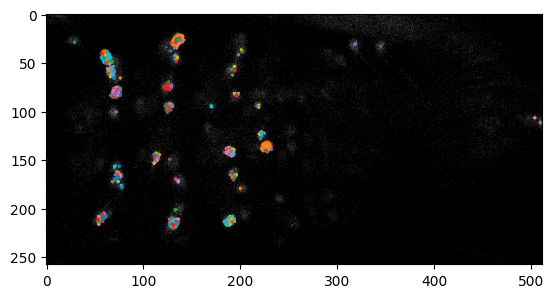

In [13]:
fig, ax = plt.subplots()
ax.imshow(frames[0], cmap="gray")

for level in levels:

    skimage_contours = measure.find_contours(denoised, level=level)
    for contour in skimage_contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

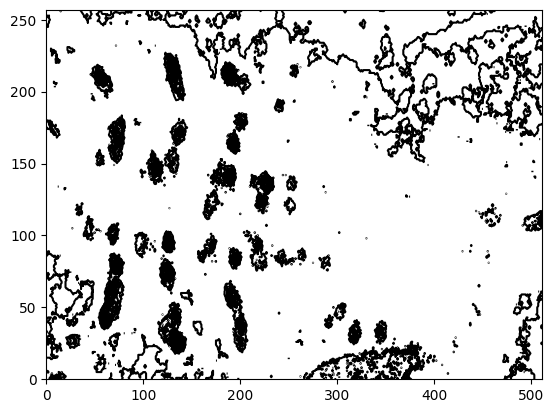

In [18]:
plt.contour(denoised, levels=20, colors="black")

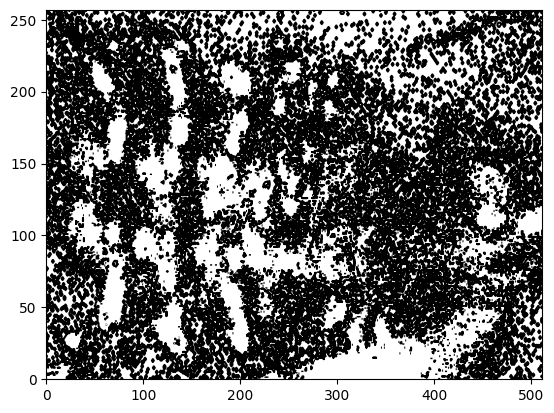

In [26]:
plt.contour(img8, levels=1, colors="black")